In [1]:
import sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df = pd.read_excel('./Subject Components Eczema with Severity and SCORAD.xlsx')

In [12]:
df = df.drop(df.tail(2).index)
df = df.drop('Subject', axis=1)
df = df.drop('Healthy/Eczema', axis=1)

In [13]:
df = df.drop("Severity", axis=1)

In [51]:
df_backup = df.sample(frac=1).reset_index(drop=True)
X = df_backup.iloc[:, 1:]
y = df_backup.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
eval_set = [(X_test, y_test)]

In [22]:
df

,SCORAD,Ceramide 2,Ceramide 3,Lactic Acid,PCA,Uric Acid,Urea,Melanin,chol,Watermass
0,52.7,0.000000,0.120289,0.026488,0.060566,0.000749,0.021031,2.230477,0.000000,43709.818546
1,66.0,0.000000,0.110608,0.086276,0.040751,0.000102,0.013240,0.037265,0.001449,50761.610963
2,70.0,0.000000,0.146709,0.051836,0.073384,0.000108,0.008633,2.728881,0.001867,39431.720135
3,65.0,0.000000,0.306053,0.229205,0.264416,0.006567,0.024359,12.517264,0.000000,24836.572041
4,61.5,0.000000,0.270734,0.129418,0.070845,0.000929,0.005694,0.733396,0.003287,76318.466566
5,28.0,0.000000,0.269898,0.029494,0.040239,0.000756,0.001809,0.671296,0.009052,71349.120402
6,34.6,0.000000,0.089972,0.092298,0.050745,0.001092,0.009536,0.281247,0.000842,43824.723571
7,25.5,0.000000,0.171575,0.068408,0.006726,0.000000,0.003233,0.000000,0.007065,58843.115552
8,65.5,0.000000,0.177142,0.047978,0.063507,0.000000,0.010505,2.324288,0.000256,29483.297350
9,49.5,0.000000,0.182292,0.083956,0.091370,0.000653,0.024600,3.598945,0.003191,58713.547888


In [61]:
len(y_test)

7

In [52]:
import skopt
from skopt import BayesSearchCV
regressors = {
    'Random Forest': (RandomForestRegressor(), {
        'n_estimators': [50, 100],
        'max_depth': [None, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt']
    }),
    'K-Nearest Neighbors': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto']
    }),
    'Decision Tree': (DecisionTreeRegressor(), {
        'max_depth': [None, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt']
    }),
    'XGBoost': (xgb.XGBRegressor(), {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [0, 0.1, 1],
    }),
    'LightGBM': (lgb.LGBMRegressor(), {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [0, 0.1, 1],
    }),
}

for reg_name, (regressor, param_grid) in regressors.items():
    grid_search = GridSearchCV(regressor, param_grid, cv=10)
    grid_search.fit(X_train, y_train)

    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    print(f"Results for {reg_name}:")
    print("Best cross-validation score (negative MSE):", -best_score)
    print("Best hyperparameters:", best_params)
    print("-----------------------------------")

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Test MSE:", mse)
    print("Test R-squared:", r2)
    print("-----------------------------------")

    scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='neg_mean_squared_error')
    print("Cross-validated MSE:", -scores.mean())
    r2_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='r2')
    print("Cross-validated R-squared:", r2_scores.mean())

Results for Random Forest:
Best cross-validation score (negative MSE): 1.7813339637362557
Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}
-----------------------------------
Test MSE: 222.09672051621894
Test R-squared: -0.09052914480092134
-----------------------------------
Cross-validated MSE: 221.1848243457354
Cross-validated R-squared: -0.1789906216100119
Results for K-Nearest Neighbors:
Best cross-validation score (negative MSE): 1.754978797328183
Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
-----------------------------------
Test MSE: 421.1654639212372
Test R-squared: -1.0679873710974923
-----------------------------------
Cross-validated MSE: 357.61142476809243
Cross-validated R-squared: -0.7736794551283815
Results for Decision Tree:
Best cross-validation score (negative MSE): 1.365414610508005
Best hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2

In [53]:
estimators = [(name, clf) for name, (clf, _) in regressors.items()]
stacking_regressor = StackingRegressor(estimators=estimators)
stacking_regressor.fit(X_train, y_train)

bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)
bagging_regressor.fit(X_train, y_train)

C:\Users\Mahir\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)

In [54]:
print(stacking_regressor.score(X_test, y_test))
print(bagging_regressor.score(X_test, y_test))

0.10015353496050772
-0.27115160552021633


In [55]:
yhat = bagging_regressor.predict(X_test)

In [56]:
y_pred = stacking_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R-squared:", r2)
print("-----------------------------------")

Test MSE: 183.26236378567154
Test R-squared: 0.10015353496050772
-----------------------------------


In [57]:
y_pred = bagging_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R-squared:", r2)
print("-----------------------------------")


Test MSE: 258.8822171428572
Test R-squared: -0.27115160552021633
-----------------------------------


In [58]:
yhat = stacking_regressor.predict(X_test)

<Axes: xlabel='SCORAD', ylabel='Density'>

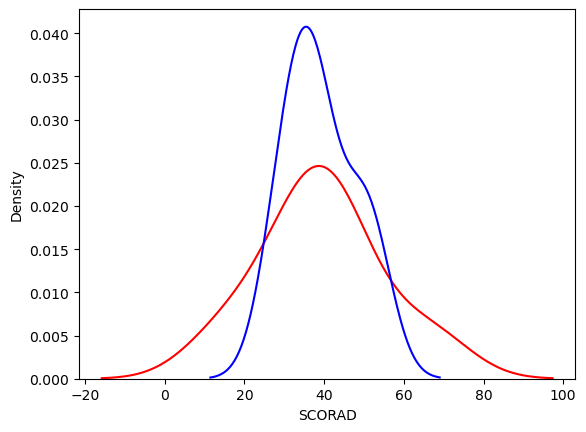

In [59]:
import seaborn as sns
sns.kdeplot(y_test, color='r')
sns.kdeplot(yhat, color='b')